In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from dotenv import load_dotenv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import email
from email import policy
from email.parser import BytesParser
import os
import re
import urllib.parse
import csv
import sqlite3
from serpapi import GoogleSearch
import json
import csv
import re
import spacy


In [5]:
from txtai import Embeddings

# Create embeddings instance with a semantic graph
embeddings = Embeddings({
  "autoid": "uuid5",
  "path": "intfloat/e5-base",
  "instructions": {
    "query": "query: ",
    "data": "passage: "
  },
  "content": True,
  "graph": {
      "approximate": False,
      "topics": {}
  }
})

# Load dataset
wikipedia = Embeddings()
wikipedia.load(provider="huggingface-hub", container="neuml/txtai-wikipedia")

query = """
SELECT id, text FROM txtai
order by percentile desc
LIMIT 10
"""

embeddings.index(wikipedia.search(query))

graph = embeddings.search("Large Language Models", 50, graph=True)

import matplotlib.pyplot as plt
import networkx as nx

def plot(graph):
    labels = {x: f"{graph.attribute(x, 'id')} ({x})" for x in graph.scan()}
    options = {
        "node_size": 750,
        "node_color": "#0277bd",
        "edge_color": "#454545",
        "font_color": "#fff",
        "font_size": 6,
        "alpha": 1.0
    }

    fig, ax = plt.subplots(figsize=(17, 8))
    pos = nx.spring_layout(graph.backend, seed=0, k=0.9, iterations=50)
    nx.draw_networkx(graph.backend, pos=pos, labels=labels, **options)
    ax.set_facecolor("#303030")
    ax.axis("off")
    fig.set_facecolor("#303030")

    plt.show()

plot(graph)

ModuleNotFoundError: No module named 'txtai'

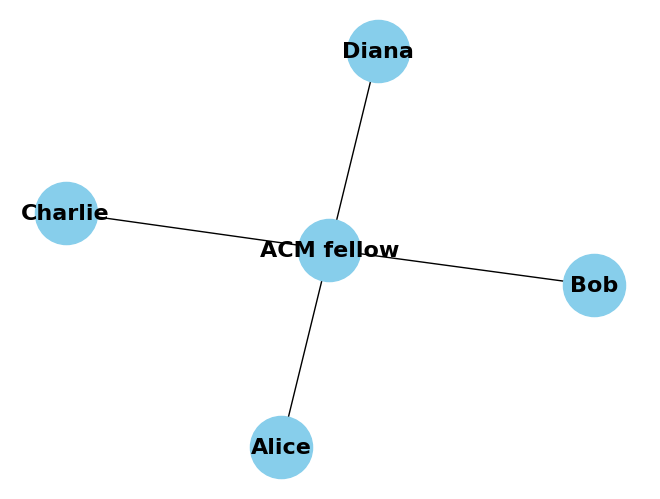

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes (individuals)
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Charlie")
G.add_node("Diana")
G.add_node("ACM fellow")
# Add edges (friendships)
G.add_edge("ACM fellow", "Bob")
G.add_edge("Alice", "ACM fellow")
G.add_edge("ACM fellow", "Diana")
G.add_edge("Charlie", "ACM fellow")

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_weight='bold')

# Show the plot
plt.show()

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def plot(graph):
    labels = {x: f"{graph.attribute(x, 'id')}" for x in graph.scan()}
    colors = ["#D32F2F", "#0277bd", "#7e57c2", "#757575"]

    results = embeddings.batchsimilarity(labels.values(), ["Roman Empire", "Germanic barbarians", "Vikings", "Normans invade"])
    colors = [colors[x[0][0]] for x in results]

    options = {
        "node_size": 2000,
        "node_color": colors,
        "edge_color": "#454545",
        "font_color": "#ffff99",
        "font_size": 11,
        "alpha": 1.0,
    }

    fig, ax = plt.subplots(figsize=(20, 9))
    pos = nx.spring_layout(graph.backend, seed=0, k=0.9, iterations=50)
    nx.draw_networkx(graph.backend, pos=pos, labels=labels, **options)
    ax.set_facecolor("#ffffff")
    ax.axis("off")
    fig.set_facecolor("#ffffff")
    plt.savefig('acm_fellow_links_0_graph.png')
    plt.show()

In [7]:
import wikipediaapi
import networkx as nx
import matplotlib.pyplot as plt

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia('CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)', 'en')
# import requests

# url = 'https://en.wikipedia.org/wiki/ACM_Fellow'
# headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}

# wiki_wiki = requests.get(url, headers=headers)
# print(wiki_wiki)

# Function to get links from a Wikipedia page
def get_links(page_title):
    page = wiki_wiki.page(page_title)
    if not page.exists():
        print(f"Page {page_title} does not exist.")
        return []
    return list(page.links.keys())

# Initial set of Wikipedia pages
seed_pages = ['List of fellows of the Association for Computing Machinery']

# Initialize graph
G = nx.Graph()

def is_potential_name(sentence):
    # Regular expression to check for a simple name pattern:
    # Starts with an uppercase letter followed by lowercase letters,
    # possibly repeated with spaces in between (e.g., "John Doe")
    name_pattern = r"^(?:[A-Z][a-z]*\s?)+$"
    
    # Remove trailing spaces for accurate checking
    sentence = sentence.strip()
    
    # Check if the sentence matches the name pattern
    if re.fullmatch(name_pattern, sentence):
        # Further refinement could involve checking against a list of common given names and surnames,
        # but this is a basic check based on formatting.
        return True
    else:
        return False            

# Populate the graph with nodes and edges based on the links between Wikipedia pages
for page_title in seed_pages:
    links = get_links(page_title)
    # print(links)
    for link in links:
        if not is_potential_name(link):  # Adding a condition to limit the graph size
            continue
        if page_title != link:  # Avoid self-loops
            G.add_edge(page_title, link)
            
            # linkss = get_links(link)
            # for linksss in linkss:
            #     if not is_potential_name(linksss):  # Adding a condition to limit the graph size
            #         continue
            #     if link != linksss:  # Avoid self-loops
            #         G.add_edge(link, linksss)
# plot(G)
# Draw the graph
plt.figure(figsize=(24, 16))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=3, font_weight='bold')
plt.title("Graph of Wikipedia Pages and Their Links")
plt.savefig('acm_fellow_links_0_graph.png')
plt.show()

# for x in G.nodes():
    # print(x)


Page Aaron Finerman does not exist.
Page Aaron Hertzmann does not exist.
Page Abdelsalam Helal does not exist.
Page Abraham Kandel does not exist.
Page Adam Finkelstein does not exist.
Page Alec Wolman does not exist.
Page Allan Gottlieb does not exist.
Page Alok Choudhary does not exist.
Page Ambuj Goyal does not exist.
Page Amin Vahdat does not exist.
Page Anand Raghunathan does not exist.
Page Andreas Moshovos does not exist.
Page Andreas Zeller does not exist.
Page Andrew Tomkins does not exist.
Page Angelos Dennis Keromytis does not exist.
Page Aravind Srinivasan does not exist.
Page Aristides Requicha does not exist.
Page Baining Guo does not exist.
Page Balaji Prabhakar does not exist.
Page Bella Bose does not exist.
Page Ben Wegbreit does not exist.
Page Bertram Herzog does not exist.
Page Brad Calder does not exist.
Page Brian Neil Levine does not exist.
Page Carl Hammer does not exist.
Page Catriel Beeri does not exist.
Page Chandra Chekuri does not exist.
Page Chandrasekhar 

AttributeError: 'Graph' object has no attribute 'scan'

In [3]:
def Serp(Q: str, engine: str, **kwargs):
    params = {
      # "engine": engine,
      "q": Q,
      "api_key": "4d01a7c923be569e5cc7431b34707148373c146d1285ada3fa2de33d3d0410eb"
    }

    search = GoogleSearch(params)
    # print(search)
    links = []
    search_result = search.get_dict().get("organic_results")
    for item in search_result:
        # print(item.get("link"))
        links.append(item.get("link"))
    # search_id = search_result.get("organic_results").get("link")
    # print('search_id ', search_result)
    # print(search.get_html())
    # print(search.get_snippet())
    return links


def GPT(prompt: str, model: str, **kwargs):
    import requests
    import json
    url = "https://gpt-api.hkust-gz.edu.cn/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": "9c77caa0882f46a19381a4796a641181556d0fe4e6c145bdb3717f5936207cae"
    }
    data = {
        "model": model,
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.7
    }
    response = requests.post(url, headers=headers, data=json.dumps(data))
    res = json.loads(response.text)

    if res["choices"][0]["message"]["content"] is not None:
        return res["choices"][0]["message"]["content"]
    else:
        return 'None'

def download_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        return response.text
    except requests.HTTPError as e:
        print(f"HTTP error for {url}: {e}")
    except Exception as e:
        print(f"Error for {url}: {e}")
    return None

def save_page(page_content, path):
    with open(path, 'w', encoding='utf-8') as file:
        file.write(page_content)


def download_all_pages(base_url, directory):
    main_page_content = download_page(base_url)
    if main_page_content is None:
        return

    # Use BeautifulSoup to parse the main page content
    soup = BeautifulSoup(main_page_content, 'html.parser')

    # Create a directory to save the downloaded pages
    os.makedirs(directory, exist_ok=True)

    # Find all links on the main page
    for link in soup.find_all('a', href=True):
        href = link['href']
        if not href.startswith('http'):
            # If the href is a relative URL, combine with the base URL
            href = requests.compat.urljoin(base_url, href)

        # Download and save the linked page
        page_content = download_page(href)
        if page_content:
            # print(href)
            file_name = href.split('/')[-1] or 'index'
            # print(file_name)
            save_path = os.path.join(directory, "downloaded_pages", file_name).replace(':', '').replace('?', '').replace('=', '')
            # os.makedirs(save_path, exist_ok=True)
            save_page(page_content, f"{save_path}.html")
            print(f"Downloaded and saved {href} to {save_path}")

# Function to download and save a single web page
def download_faculty_page(url, directory):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError if the HTTP request returned an unsuccessful status code

        # Extract faculty name or title from URL for the filename
        filename = url.split("/")[-1] or "index"
        filepath = os.path.join(directory, f"{filename}.html")

        with open(filepath, 'w', encoding='utf-8') as file:
            file.write(response.text)
            print(f"Downloaded and saved web page: {url}")

    except requests.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")

def download_mhtml_page(url, directory, save_name):
    # Configure Chrome options
    chrome_options = Options()
    # chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("–save - page - as -mhtml")

    # Set path to chromedriver as per your installation
    # chromedriver_path = Service('chromedriver/chromedriver.exe')

    # Initialize the Chrome WebDriver with the specified options
    # driver = webdriver.Chrome(service=chromedriver_path, options=chrome_options)
    driver = webdriver.Chrome()

    # Open the URL
    driver.get(url)

    # Give the page a moment to load
    time.sleep(10)

    # Save page as MHTML
    page_source = driver.execute_cdp_cmd('Page.captureSnapshot', {})
    # e_names = driver.find_elements(value='english-name')

    # Define the output path for the MHTML file
    # filename = "falcuty_mit"#url.split("/")[-1] or "index"
    output_path = os.path.join(directory, f"{save_name}.mhtml")
    with open(output_path, 'w', newline='') as file:
        # print(page_source['data'])
        file.write(page_source['data'])

    print(f"Page saved as MHTML in {output_path}")
    # Close the browser
    driver.quit()
    # parse_mhtml_file(output_path, directory)

def sqltool(file_path, header, sql_query):

    # sql_table(file_path, header)
    conn = sqlite3.connect('faiss_document_store.db')
    cursor = conn.cursor()

    # sql_query = "SELECT * FROM your_table_name;"

    cursor.execute(sql_query)

    rows = cursor.fetchall()
    print('answer is:', rows)

    columns = [description[0] for description in cursor.description]

    with open('output.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(columns)
        writer.writerows(rows)
        
    table_name = 'faculty'
    cursor.execute(f'DROP TABLE IF EXISTS {table_name}')
    
    conn.commit()
    conn.close()

def sql_table(file_path, header):
    # Path to the CSV file
    csv_file_path = file_path
    
    # List of column names
    list_column = header
    
    # Connect to the SQLite database
    conn = sqlite3.connect('faiss_document_store.db')
    cursor = conn.cursor()
    
    # Create the table in the database
    # Join the columns with their respective data types for the SQL statement
    columns_with_types = ', '.join([f'{col} TEXT' for col in list_column])
    print(columns_with_types)
    
    cursor.execute(f'''
    CREATE TABLE IF NOT EXISTS faculty (
        {columns_with_types}
    )
    ''')
    
    # Open the CSV file and read its data
    with open(csv_file_path, newline='') as csvfile:
        # Create a CSV reader object using the csv module
        csv_reader = csv.reader(csvfile)
        
        # Skip the header row
        next(csv_reader)
        
        # Prepare the INSERT INTO statement with placeholders for the values
        placeholders = ', '.join(['?' for _ in list_column])
        sql = f'INSERT INTO faculty ({", ".join(list_column)}) VALUES ({placeholders})'
        
        # Insert each row into the faculty table
        for row in csv_reader:
            # Execute the SQL command with the row data
            cursor.execute(sql, row)

    # Commit the transaction and close the connection
    conn.commit()
    conn.close()
    
def is_potential_name(sentence):
    # Regular expression to check for a simple name pattern:
    # Starts with an uppercase letter followed by lowercase letters,
    # possibly repeated with spaces in between (e.g., "John Doe")
    name_pattern = r"^(?:[A-Z][a-z]*\s?)+$"
    
    # Remove trailing spaces for accurate checking
    sentence = sentence.strip()
    
    # Check if the sentence matches the name pattern
    if re.fullmatch(name_pattern, sentence):
        # Further refinement could involve checking against a list of common given names and surnames,
        # but this is a basic check based on formatting.
        return True
    else:
        return False

In [49]:
def parse_mhtml_file(file_path, directory, question):
    # faculty_list = open(os.path.join(directory, 'faculty.csv'), 'a+')
    # schema_template = "The question is {}, put the question into table schema, just output the schema.".format(question)
    # schema_column = GPT(schema_template, "GPT-4")
    # print(schema_column)
    # schema = ''
    # code_template = "Put the question {} into a table schema and tore schema in a variable named ‘schema‘.Then write a python code to parse html file to extract information to fill the table schema. The html file path is:{}. The table save to {}, and table's name is facuty.csv. Just output the code, no other word or symbol.".format(
    #                     question, file_path, directory)
    # exec_code = GPT(code_template, "GPT-4")
    # exec_code = exec_code[10:-4]
    # print(exec_code)
    # exec(exec_code)
    
    with open(file_path, 'rb') as file:
        msg = BytesParser(policy=policy.default).parse(file)

        # Check if the message is multipart
        if msg.is_multipart:
            for part in msg.iter_parts():
                content_type = part.get_content_type()
                # # Extract HTML content
                # en_name = ''
                # ch_name = ''
                # degree_name = ''
                # school_name = ''
                # job_en_name = ''
                # job_department = ''
                # email = ''
                # office = ''
                # web = ''

                if content_type == 'text/html':
                    html_content = part.get_payload(decode=True).decode('utf-8')
                    # Do something with the HTML content
                    # print("HTML Content:")
                    # print(html_content)
                    soup = BeautifulSoup(html_content, 'html.parser')
                    all = soup.find_all('p')
                    link = soup.find_all('a')
                    count = 0
                    # print(str(all)[:100])
                    
                    faculty_list = []
                    faculty_dict = {}
                    key_id = ''
                    all_key = []
                    info = ''
                    link = ''
                    label = ''
                    for i, value in enumerate(link):
                        link += value.text + '. '
                        # key = value.get('class')[0] if value.get('class') != None else 'Not_know'
                        # key = key.replace('-', '_')
                        # nlp = spacy.load("en_core_web_sm")
                        # doc = nlp(value.text)
                        # for ent in doc.ents:
                        #     # print('ent = ', ent)
                        #     # print('ent.label = ', ent.label_)
                        #     key = ent.label_
                        #     if ent.label_ == 'PERSON':
                        #         faculty_list.append(faculty_dict)
                        #         print(faculty_dict)
                        #         faculty_dict = {}
                        
                        # if 'professor' in value.text or 'Professor' in value.text:
                        #     key = 'position'
                        # if '@' in value.text:
                        #     key = 'email'
                        # if '©' not in value.text:
                        #     faculty_dict[key] = value.text
                        # all_key.append(key)
                    for i, value in enumerate(all):
                        info += value.text + '. '
                   
                    # answer_prompt = 'At first, put the question {} into a table schema. Given a paragraph:{}, using the information from paragraph to fill the table. Then answer the question. if you can not answer, Just output no answer, no other word or symbol'.format(question, info)
                    # print('info= ', info)
                    answer_prompt = 'Read the paragraph:{}.The question is {}. put the question into table schema, then extract information related to the question to fill the table and answer the question. If you need to perform mathematical calculations, design the required operations and execute them on the table.if can not answer the question, just output no answer, no other word or symbol'.format(info, question)
                    answer = GPT(answer_prompt, "GPT-4")
                    # print('answer 1 = ', answer_prompt)
                    if 'No answer' not in answer and 'no answer' not in answer:
                        print(answer)
                    else:
                        answerl_prompt = 'Read the paragraph:{}.The question is {}. put the question into table schema, then extract information related to the question to fill the table and answer the question. If you need to perform mathematical calculations, design the required operations and execute them on the table. if can not answer the question, just output no answer, no other word or symbol'.format(link, question)
                        answerl = GPT(answerl_prompt, "GPT-4")
                        # print('answer 2 = ', answerl_prompt)
                        if 'No answer' not in answerl and 'no answer' not in answerl:
                            print(answerl)
                        else:
                            conn = sqlite3.connect('faiss_document_store.db')
                            cursor = conn.cursor()
                            nlp = spacy.load("en_core_web_sm")
                            for i, value in enumerate(all):
                                # if is_potential_name(value.text):
                                #     faculty_list.append(faculty_dict)
                                #     print(value.text)
                                #     faculty_dict = {}
                                doc = nlp(value.text)
                                for ent in doc.ents:
                                    # print('ent = ', ent)
                                    # print('ent.label = ', ent.label_)
                                    label = ent.label_
                                    if ent.label_== 'PERSON' and is_potential_name(value.text):
                                        faculty_list.append(faculty_dict)
                                        # print(value.text)
                                        faculty_dict = {}
                                    
                                # print(value.get('class')[0] if value.get('class') != None else 'None')
                                if value.get('class') != None:
                                    key = value.get('class')[0]  
                                    key = key.replace('-', '_')
                                else:
                                    key = label
                                    # if key == 'ORG':
                                    #     key = 'orginazation'
                                    # if key == key_id:
                                    #     if len(faculty_dict) > count:
                                    #         count = len(faculty_dict) 
                                    #         f_key = faculty_dict.keys()
                                    #         for ff_key in f_key:
                                    #             ff_key = re.sub(r'\d', 'a', ff_key)
                                    #             all_key.append(ff_key)
                                    #         print('all_key? = ', all_key)
                                    #         # all_key = list(key_dic)
                                    #     faculty_list.append(faculty_dict)  
                                    #     faculty_dict = {}                         
                                        
                                    # if i == 0:
                                    #     key_id = key
                                    
                                    # doc = nlp(value.text)
                                    # for ent in doc.ents:
                                    #     # print('ent = ', ent)
                                    #     # print('ent.label = ', ent.label_)
                                    #     key = ent.label_
                                        # if 'name' in key:
                                        #     key = 'PERSON'
                                        # if ent.label_ == 'PERSON':
                                        #     # print(faculty_dict)
                                        #     faculty_list.append(faculty_dict)
                                        #     faculty_dict = {}
                                    
                                    if 'professor' in value.text or 'Professor' in value.text:
                                        key = 'position'
                                    if '@' in value.text:
                                        key = 'email'
                                if '©' not in value.text:
                                    faculty_dict[key] = value.text
                                    
                                # print(key)
                                all_key.append(key)
                                    # faculty_list.append(faculty_dict)
                            
                            
                            # print(list(dict.fromkeys(faculty_dict)))
                            json_filename = 'faculty.json'
                            
                            with open(json_filename, 'w') as file:
                            # The json.dump method serializes `data` to a JSON formatted string and writes it to the file
                                json.dump(faculty_list, file, indent=4)


                            all_key = list(set(all_key))
                            print('all_key= ', all_key)
                           
                            table_name = 'faculty'
                            cursor.execute(f'DROP TABLE IF EXISTS {table_name}')
                            columns_with_types = ', '.join([f'{col} TEXT' for col in all_key])
                            print('columns_with_types= ', columns_with_types)
                            cursor.execute(f'''
                            CREATE TABLE IF NOT EXISTS faculty (
                                {columns_with_types}
                            )
                            ''')
                        
                            with open(json_filename, 'r') as json_file:
                                data = json.load(json_file)
                            
                            # Open the CSV file
                            with open('faculty.csv', 'w', newline='') as csv_file:
                                csv_writer = csv.writer(csv_file)
                                csv_writer.writerow(all_key)
                                # Write the headers
                                # csv_writer.writerow(data[0].keys())
                            
                                # Write the data
                                for item in data:
                                    # if item != None:
                                    # print('item =', item)
                                    key_clm = [] 
                                    placeholders = []
                                    csv_writer.writerow(item.values())
                                    for i, item_i in enumerate(item):
                                        # print(item_i)
                                        if item_i in all_key:
                                            key_clm.append(item_i) 
                                            value_i = item[item_i]
                                            placeholders.append('\'' + value_i.replace('\'', '').replace(',', '') + '\'')
                                            # placeholders = ', '.join(['\''+value.replace('\'', '')+'\'' for value in item.values()])
                                    # print('key_clm = ', key_clm)
                                    # print('placeholders= ', placeholders)
                                    if key_clm != []: 
                                        sql = f'INSERT INTO faculty ({", ".join(key_clm)}) VALUES ({", ".join(placeholders)})'
                                        # print(sql)
                                        cursor.execute(sql)
                                    
                            conn.commit()
                            conn.close()
        
                            sql_prompt = 'The question is {}, the table name is faculty, the table columns are {}, the table row is {}, write a SQL to solve the question. Just output the SQL, no other word or symbol'.format(question, all_key, data[10].values())
                            sql = GPT(sql_prompt, "GPT-4")
                            # print(list(header))
                            # print(sql_prompt)
                            print(sql)
                            # sql = 'SELECT COUNT(job_department) FROM faculty'
                            sql = sql.replace('```sql', '').replace('```', '')
                            sqltool('faculty.csv', all_key, sql)                    
                    break
                    # exec(exec_code)
                    # print(info)
                    # q = ' what is the number of faculties in each thrust?' #how many thrusts in HKUST (GZ)? What are these thrusts?
                    # prompt = 'At first, put the question {} into a table schema. Give a paragraph: {}, using the information from paragraph to fill the table. Then based on the table, answer the question{} '.format(q, info, q)
                    # prompt = 'Example text data is {}.All text data is in variable info. write a python code to transfer all text data to a list of dictionaries, each representing a faculty member. Then save the list of dictionaries csv file and named faculty.csv. Just output the code, no other word or symbol.'.format(info[:500])
                    # # prompt = 'write a python code to store the text {} to csv file,the csv file contains information about faculty and save in faculty.csv'.format(info[:500])
                    # exec_code = GPT(prompt, "GPT-4")
                    # # print('response = ', response)
                    # exec_code = exec_code[10:-4]
                    # print(exec_code)
                    # exec(exec_code)
                    # for value in all:
                    #     # print(value.get('class'))
                    #     if value.get('class') == None:
                    #         con = value.get_text()
                    #         if '@' in con:
                    #             email = con
                    #         elif 'Personal Web' in con:
                    #             web_a = value.find_all('a')
                    #             for web_l in web_a:
                    #                 web = web_l.get('href')
                    #                 print(web)
                    #         else:
                    #             office = con
                    #     else:
                    #         class_t = value.get('class')[0]
                    #         if class_t == 'english-name':
                    #             # print(en_name)
                    #             if count != 0:
                    #                 # print(en_name)
                    #                 faculty_list.write(en_name + '\t' + ch_name + '\t' + degree_name
                    #                                    + '\t' + school_name + '\t' + job_en_name + '\t' + job_department + '\t'
                    #                                    + email + '\t' + office + '\t' + web + '\n')
                    #                 ch_name = ''
                    #                 degree_name = ''
                    #                 school_name = ''
                    #                 job_en_name = ''
                    #                 job_department = ''
                    #                 email = ''
                    #                 office = ''
                    #                 web = ''
                    #             count += 1
                    #             en_name = value.get_text()
                    #         if class_t == 'chinese-name':
                    #             ch_name = value.get_text()
                    #         if class_t == 'degree-name':
                    #             degree_name = value.get_text()
                    #         if class_t == 'school-name':
                    #             school_name = value.get_text()
                    #         if class_t == 'job-en-name':
                    #             job_en_name = value.get_text()
                    #         if class_t == 'job-department':
                    #             job_department = value.get_text()

                # # Extract embedded resources (e.g., images, CSS, JavaScript)
                # suffix = ''
                # elif content_type.startswith('image/') or content_type.startswith('text/css'):
                #     if content_type.startswith('image/'):
                #         suffix = '.jpg'
                #     else:
                #         suffix = '.css'
                #     content_disposition = part.get('Content-Disposition', '')
                #     match = re.search(r'filename="(.*?)"', content_disposition)
                #     save_directory = os.path.join(directory, 'resources')
                #     if match:
                #         filename = match.group(1)
                #     else:
                #         filename = f"resource_{len(os.listdir(save_directory))}.{suffix}"
                #     resource_data = part.get_payload(decode=True)
                #     with open(os.path.join(save_directory, filename), 'wb') as resource_file:
                #         resource_file.write(resource_data)
                
                #     # Modify HTML to point to the downloaded resource
                #     resource_url = urllib.parse.urljoin('resources/', filename)
                #     html_content = html_content.replace(part.get_content_type(), resource_url)
                
                #     # Do something with the resource (e.g., save to disk)
                #     # print(f"Resource saved: {filename}")

In [50]:
def main():

    print_user = True # Controls whether the prompt input field is entered
    history = []
    faculty_urls = 'https://facultyprofiles.hkust-gz.edu.cn'
    query= 'How many thrusts in HKUST (GZ)?'
    # How many faculty in MIT CS?
    # What is the email of Nan Tang?
    # faculty_urls = 'https://www.eecs.mit.edu/role/faculty-cs/'
    # faculty_urls = 'https://www.baidu.com/'
    save_directory = "faculty_pages"
    
    
    print("=============Welcome to the FacultyQA, enter 'exit' to exit the procedure==============")
    print('=======================Please enter the question, press Enter to end===================')
    # print("===============================Let's begin ================================\n\n")
    if print_user:
        query = input('Query:')
        # print("# Query：{}".format(query))
    else:
        query = input('# Query:')
        
    while True:
        if query=='exit':
            break
        # query = query.strip()
        save_name = 'faculty_info'
        # # os.mkdir(save_directory)
        # links = Serp(query, 'google')
        # link_prompt =  'The links are:{}, choose one link that is most relevant to the question {}, only output the link.'.format(links, query)
        # selected_link = GPT(link_prompt, "GPT-4")
        # # print(selected_link)
        # if selected_link != 'default value' and selected_link.startswith("http"):
        #     faculty_urls = selected_link
        # print('selected urls: ', faculty_urls)
        # download_all_pages(faculty_urls, save_directory)
        # download_faculty_page(faculty_urls, save_directory)
        # download_mhtml_page(faculty_urls, save_directory, save_name)
        # parse_mhtml_file(os.path.join(save_directory, f"{save_name}.mhtml"), save_directory, query)
        # download_all_pages('https://en.wikipedia.org/wiki/List_of_fellows_of_the_Association_for_Computing_Machinery', 'ACMfellow')
        query = input('Query:')
        
        

In [51]:
if __name__ == '__main__':
    main()

=============Welcome to the FacultyQA, enter 'exit' to exit the procedure==============
=======================Please enter the question, press Enter to end===================


Query: A


https://en.wikipedia.org/wiki/List_of_fellows_of_the_Association_for_Computing_Machinery#bodyContent
List_of_fellows_of_the_Association_for_Computing_Machinery#bodyContent
Downloaded and saved https://en.wikipedia.org/wiki/List_of_fellows_of_the_Association_for_Computing_Machinery#bodyContent to ACMfellow\downloaded_pages\List_of_fellows_of_the_Association_for_Computing_Machinery#bodyContent
https://en.wikipedia.org/wiki/Main_Page
Main_Page
Downloaded and saved https://en.wikipedia.org/wiki/Main_Page to ACMfellow\downloaded_pages\Main_Page
https://en.wikipedia.org/wiki/Wikipedia:Contents
Wikipedia:Contents
Downloaded and saved https://en.wikipedia.org/wiki/Wikipedia:Contents to ACMfellow\downloaded_pages\WikipediaContents
https://en.wikipedia.org/wiki/Portal:Current_events
Portal:Current_events
Downloaded and saved https://en.wikipedia.org/wiki/Portal:Current_events to ACMfellow\downloaded_pages\PortalCurrent_events
https://en.wikipedia.org/wiki/Special:Random
Special:Random
Downloaded

KeyboardInterrupt: Interrupted by user